In [2]:
import numpy as np
from stl import mesh
import cv2 as cv
from PIL import Image
from PIL import ImageFilter
import matplotlib.pyplot as plt

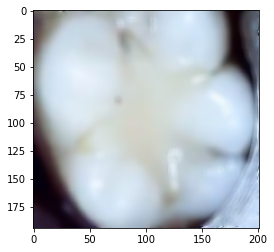

In [6]:
plt.imshow(Image.open('teeth_dataset/teeth_dataset/footage/2.png').filter(ImageFilter.BLUR))

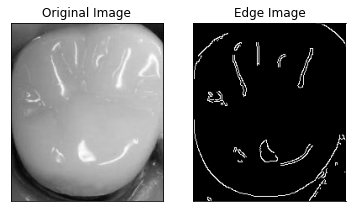

(213, 182)

In [16]:
img = cv.imread('teeth_dataset/teeth_dataset/Trianing/without_caries/nc11.jpg',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()
imageNp = np.array(grey_img)
imageNp.shape

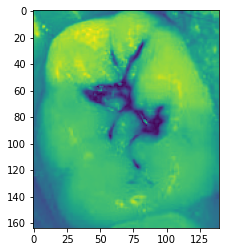

In [35]:
img = cv.imread('teeth_dataset/teeth_dataset/Trianing/caries/wc32.jpg', cv.IMREAD_GRAYSCALE)
gray_image = cv.medianBlur(img,9)
plt.imshow(img)

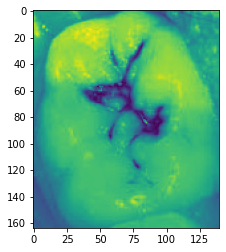

In [17]:
grey_img = Image.open('teeth_dataset/teeth_dataset/Trianing/caries/wc32.jpg').convert('L')
plt.imshow(grey_img)

(213, 182)

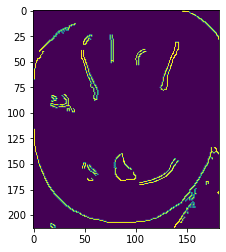

In [18]:
grey_img = edges
plt.imshow(grey_img)
grey_img.shape

In [7]:
img = cv.imread('teeth_dataset/teeth_dataset/footage/2.png', cv.IMREAD_GRAYSCALE)
gray_img = cv.medianBlur(img,9)
#img = Image.open('teeth_dataset/teeth_dataset/Trianing/caries/wc32.jpg')
#max_size=(500,500)
#max_size = gray_img.shape
max_height= gray_img.shape[1]/1.618
min_height=0

#height=0 for minPix
#height=maxHeight for maxPIx

#gray_img.resize(max_size)
imageNp = np.array(gray_img)
maxPix=imageNp.max()
minPix=imageNp.min()

print(imageNp)
(nrows,ncols)=gray_img.shape

vertices=np.zeros((nrows,ncols,3))

for x in range(0, nrows):
  for y in range(0, ncols):
    pixelIntensity = imageNp[x][y]
    z = ((255-pixelIntensity) * max_height) / maxPix
    #print(imageNp[y][x])
    vertices[x][y]=(x, y, z)

faces=[]

for x in range(0, nrows - 1):
  for y in range(0, ncols - 1):
    # create face 1 and face 2
    vertice1 = vertices[x][y]
    vertice2 = vertices[x+1][y]
    vertice3 = vertices[x+1][y+1]
    vertice4 = vertices[x][y+1]
    
    face1 = np.array([vertice1,vertice2,vertice3])
    face2 = np.array([vertice1,vertice4,vertice3])

    faces.append(face1)
    faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)
# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]
# Write the mesh to file
surface.save('canny_surface.stl')
print(surface)

[[ 96  96  96 ...  90  96  98]
 [ 95  96  96 ...  90  96  98]
 [ 92  95  95 ...  90  96  98]
 ...
 [ 39  39  39 ... 215 216 216]
 [ 39  39  39 ... 215 215 215]
 [ 39  39  39 ... 215 215 215]]
number of faces: 77200


In [43]:
grey_img = Image.open('teeth_dataset/teeth_dataset/Trianing/caries/wc32.jpg').convert('L')

#max_size=(500,500)
max_size = grey_img.size
max_height= grey_img.size[1]/1.618
min_height=0

#height=0 for minPix
#height=maxHeight for maxPIx

grey_img.resize(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()

print(imageNp)
(ncols,nrows)=grey_img.size

vertices=np.zeros((nrows,ncols,3))

for x in range(0, nrows):
  for y in range(0, ncols):
    pixelIntensity = imageNp[x][y]
    z = ((255-pixelIntensity) * max_height) / maxPix
    #print(imageNp[y][x])
    vertices[x][y]=(x, y, z)

faces=[]

for x in range(0, nrows - 1):
  for y in range(0, ncols - 1):
    # create face 1 and face 2
    vertice1 = vertices[x][y]
    vertice2 = vertices[x+1][y]
    vertice3 = vertices[x+1][y+1]
    vertice4 = vertices[x][y+1]
    
    face1 = np.array([vertice1,vertice2,vertice3])
    face2 = np.array([vertice1,vertice4,vertice3])

    faces.append(face1)
    faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)
# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]
# Write the mesh to file
surface.save('surface.stl')
print(surface)

[[172 147 137 ... 192 193 188]
 [173 149 135 ... 174 176 173]
 [173 152 133 ... 169 169 169]
 ...
 [ 83  77  70 ...  95  92  90]
 [ 84  79  73 ...  94  91  89]
 [ 82  79  76 ...  94  91  89]]
number of faces: 45314
